<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [483]:
# Читаем файл из csv и записываем данные в hh_data

hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') 
hh_data.tail(3) # Выводим на экран последние 3 строки

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [484]:
# Смотрим рамерность таблицы

hh_data.shape 

(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [485]:
# Выводим основную информацию

hh_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [486]:
# Смотрим количество пустых значений

hh_data.isnull().sum(axis=0)

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

In [487]:
# Смотрим сколько уникальных значений содержится в столбце Опыт работы

hh_data['Опыт работы'].nunique()

44413

In [488]:
# Смотрим какая из искомых должностей самая распространённая

hh_data['Ищет работу на должность:'].mode()

0    Системный администратор
Name: Ищет работу на должность:, dtype: object

5. Выведите основную статистическую информацию о столбцах.


In [489]:
# Выводим общую статистику таблици

hh_data.describe() 

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [490]:
# Создаем копирую данных

hh_df = hh_data.copy() 

In [491]:
# Создаем признак Образование

level_list = [] # Список нового столбца Образование
level = ['Среднее специальное',
         'Неоконченное высшее',
         'Высшее',
         'Среднее',
         'Неоконченное'] # Список для проверки слова или словосочетания

def get_level_education(education): # Функция выделения нужного слова и словосочитания
    offer = education.split() # Разделяем строку на слова игнорируя возможные пробелы в данных
    for word in offer: # Проходим по списку с разделенными словами
        if word in level: # Проверяем есть ли слово в списке для проверки
            if word + ' ' + offer[1] in level: # Конкатенируем и проверяем есть ли словосочетание в списки проверки
                level_list.append(word + ' ' + offer[1]) # Конкатенируем и добовляем словосочетание в список нового столбца
            else:
                level_list.append(word) # Добовляем слово в список нового столбца
        return

for i in hh_df["Образование и ВУЗ"]: # Проходим по столбцу
    get_level_education(i) # Подставляем значение из столбца в функцию

hh_df['Образование'] = level_list

In [492]:
# Смотрим сколько соискателей имеет средний уровень образования (школьное образование)

hh_df['Образование'].value_counts()

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

In [493]:
# Удаляем столбец Оброзование и ВУЗ

hh_df = hh_df.drop('Образование и ВУЗ', axis=1) 

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [494]:
# Создаем признак Пол

sex_list = [] # Список нового столбца Пол

def get_sex(sex): # Функция выделения нужного слова и словосочитания
    offer = sex.split() # Разделяем строку на слова игнорируя возможные пробелы в данных
    for word in offer: # Проходим по списку с разделенными словами
        if word == 'Мужчина': # Проверяем равенство 
            sex_list.append('М') # Если Истина добовляем М в список нового столбца
        else:
            sex_list.append('Ж') # Если Ложь добовляем Ж в список нового столбца
        return

for i in hh_df['Пол, возраст']: # Проходим по столбцуci
    get_sex(i) # Подставляем значение из столбца в функцию

hh_df['Пол'] = sex_list # Создаем новый столбец и заполняем его данными из списка нового столбца

In [495]:
# Смотрим сколько процентов женских резюме представлено в наших данных

round((hh_df['Пол'].value_counts(normalize=True) * 100), 2) 

М    80.93
Ж    19.07
Name: Пол, dtype: float64

In [496]:
# Создаем признак Возраст

age_list = [] # Список нового столбца Возраст

def get_age(age): # Функция выделения возраста из строки
    
    offer = age.split() # Разделяем строку на слова игнорируя возможные пробелы в данных
    
    for i in offer: # Проходим по списку с разделенными словами
        if i == offer[2]: # Проверяем равенство 
            age_list.append(int(i)) # Если Истина добовляем число в список нового столбца
            return

for y in hh_df['Пол, возраст']: # Проходим по столбцу
    get_age(y) # Подставляем значение из столбца в функцию
    
hh_df['Возраст'] = age_list # Создаем новый столбец и заполняем его данными из списка нового столбца

In [497]:
# Смотрим чему равен средний возраст соискателей

round(hh_df['Возраст'].mean(), 1)

32.2

In [498]:
# Удаляем столбец Пол, возраст

hh_df = hh_df.drop('Пол, возраст', axis=1) 

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [499]:
# Создаем признак Опыт работы

hh_df.loc[hh_df['Опыт работы'] =='Не указано', 'Опыт работы'] = np.nan # Заменяем словосочетание "Не указано" на NaN

exp_list = [] # Список нового столбца Опыт работы (месяц)
year = ['год', 'года', 'лет'] # Список проверки слов Года
month = ['месяц', 'месяца', 'месяцев'] # Список проверки слов Месяца

def get_experience(exp): # Функция выделения чисел из строки
    
    year_= 0 # Переменная года
    sum_ = 0 # Счетчик месяцев
    num = 0 # Временное число
    offer = str(exp).split() # Разделяем строку на слова игнорируя возможные пробелы в данных
    
    for i in range(len(offer)):# Проходим по индексам списка с разделенными словами
        if offer[i].isdigit(): # Проверяем является ли слово числом
            num = 0 # Обнуляем переменную
            num += int(offer[i]) # Создаем временное число
            continue # Перезапускаем цикл
        if offer[i] in year and year_ == 0: # Проверяем входит ли слово в список проверки и равна ли переменная года 0
            year_ += num # Фиксируем года
            sum_ += num * 12 # Переобразуем года в месяца
        elif offer[i] in month and num <= 11: # Проверяем входит ли слово в список проверки и выполняется ли условие
            sum_ += num # Складываем опыт работы в месяцах
            break # Останавливаем цикл
        elif i > 16: # Принудительная остановка. Проверяем не более 16 слов. В некоторых строках после указания опыта, встречается слово месяц. 
            break

    return exp_list.append(sum_)  # Заносим Опыт работы в месяцах в список нового столбца

for y in hh_df['Опыт работы']:# Проходим по столбцу
    get_experience(y) # Подставляем значение из столбца в функцию

hh_df['Опыт работы (месяц)'] = exp_list # Создаем новый столбец и заполняем его данными из списка нового столбца

In [500]:
# Смотрим чему равен медианный опыт работы (в месяцах) в нашей таблице

hh_df['Опыт работы (месяц)'].median()

100.0

In [501]:
# Удаляем столбец Опыт работы

hh_df = hh_df.drop('Опыт работы', axis=1) 

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [502]:
# Создаем признак Город

city_mil = ['Новосибирск',
            'Екатеринбург',
            'Нижний Новгород',
            'Казань',
            'Челябинск',
            'Омск',
            'Самара',
            'Ростов-на-Дону',
            'Уфа',
            'Красноярск',
            'Пермь',
            'Воронеж',
            'Волгоград'] # Список проверки городов миллионников

city_stl = ['Москва', 'Санкт-Петербург'] # Список проверки столиц

def get_city(city): # Функция распределения названия городов по категориям 
    
    offer = city.split() # Разделяем строку на слова игнорируя возможные пробелы в данных
    city_ = offer[0] # Выбераем перевое слово из списка которое является название города
    
    if city_ in city_stl: # Проверяем есть ли название города в списке столиц
        return city_ # Если ИСТНА возвращаем название стольцы
    elif city_ in city_mil: # Проверяем есть ли название города в списке городов миллионников
        return 'город-миллионник' # Если ИСТНА возвращаем название стольцы
    else:
        return 'другие' # Иначе возвращаем название городав в другие

city_ = hh_df['Город, переезд, командировки'].apply(get_city) # Применяем функцию к столбцу и заносим данные

hh_df['Город'] = city_ # Создаем новый столбец и заполняем его данными из city_ (pandas.core.series.Series)

In [503]:
# Смотрим сколько процентов соискателей живут в Санкт-Петербурге

round(hh_df['Город'].value_counts(normalize=True) * 100)

Москва              37.0
другие              37.0
город-миллионник    15.0
Санкт-Петербург     11.0
Name: Город, dtype: float64

In [504]:
# Создаем признак Готовность к переезду

bool_=[] # Основной список нового столбца булевых значений
mov_list = ['готов',
            'готова',
            'хочу',
            'буду',
            'могу',
            'согласен',
            'согласна'] # Список проверки слов определяющих желание переезжать

def get_moving(mov): # Функция поиска и выделения подстроки 'не'
    
    offer = mov.split() # Разделяем строку на слова игнорируя возможные пробелы в данных
    
    for y in offer: # Проходим по данным списка с разделенными словами
        if y == 'не': # Если находится первая подстрока 'не' значит человек не готов к переезду
            bool_.append(False) # Добовляем в список  ЛОЖЬ
            break # Останавливаем цикл
        elif y in mov_list: # Если находится первая слово желающих переезжать, значит человек готов к переезду
            bool_.append(True) # Останавливаем цикл
            break # Останавливаем цикл
    return

for i in hh_df['Город, переезд, командировки']: # Проходим по столбцу
    get_moving(i) # Подставляем значение из столбца в функцию
    
hh_df['Готовность к переезду'] = bool_

In [505]:
# Создаем признак Готовность к командировкам

bool_2 = [] # Основной список нового столбца булевых значений

def get_business_trip(trip):
    
    offer = trip.split(',')
    bool_1 = [] # Временный список булевых значений
    
    for y in offer:
        if y.strip().startswith('не'): # Удаляем у подстроки первый и последний пробел. Если подстрака начинается с 'не'
            bool_1.append(False) # Добовляем во временный список ЛОЖЬ
        else:
            bool_1.append(True) # Иначе добовляем во временный список ИСТИНА
    
    if y.find('командир') == -1: # Если в строке нет слова начинающееся с 'командир' значит человек не готов к командировкам
            bool_1[-1] = False
    if  bool_1[-1] == False: # Если во временном списке последнее значение является ЛОЖЬ значит человек не готов к командировкам
        bool_2.append(False) # Добовляем ЛОЖЬ в основной список
    else:
        bool_2.append(True) # Иначе дбовляем ИСТИНА

    return
   
for i in hh_df['Город, переезд, командировки']: # Проходим по столбцу
    get_business_trip(i) # Подставляем значение из столбца в функцию

hh_df['Готовность к командировкам'] = bool_2

In [506]:
# Смотрим сколько процентов соискателей готовы одновременно и к переездам, и к командировкам

round(hh_df[(hh_df['Готовность к переезду'] == True) & (hh_df['Готовность к командировкам'] == True)].shape[0] / 44744 * 100)

32

In [507]:
# Удаляем столбец Город, переезд, командировки

hh_df = hh_df.drop('Город, переезд, командировки', axis=1) 

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [508]:
schedul_list = [] # Список заголовков категории График работы
    
def get_schedule(sched): # Функция поиска и выделения категории
    
    offer = [x.strip() for x in sched.split(',')] # Разделяем строку на слова удаляем возможные пробелы в данных
    
    for y in offer: # Проходим по списку с разделенными словами
        
        if y not in schedul_list: # Если категория не находится в списке значит добовляем ее
            schedul_list.append(y) # Добавляем в список 

for i in hh_df['График']: # Проходим по столбцу
    get_schedule(i) # Подставляем значение из столбца в функцию

schedul_list

['гибкий график',
 'полный день',
 'сменный график',
 'вахтовый метод',
 'удаленная работа']

In [509]:
employment_list = [] # Список заголовков категории Занятость
    
def get_employment(empl): # Функция поиска и выделения категории
    
    offer = [a.strip() for a in empl.split(',')] # Разделяем строку на слова удаляем возможные пробелы в данных
    
    for y in offer: # Проходим по списку с разделенными словами
        
        if y not in employment_list: # Если категория не находится в списке значит добовляем ее
            employment_list.append(y) # Добавляем в список
            
for i in hh_df['Занятость']: # Проходим по столбцу
    get_employment(i) # Подставляем значение из столбца в функцию

employment_list

['частичная занятость',
 'проектная работа',
 'полная занятость',
 'стажировка',
 'волонтерство']

In [510]:
ch_list = []
def get_E_1(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('частичная занятость') >= 0:
            return ch_list.append(True)
        else:
            return ch_list.append(False)
for t in hh_df['Занятость']:
    get_E_1(t)
hh_df['частичная занятость'] = ch_list

In [511]:
pr_list = []
def get_E_2(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('проектная работа') >= 0:
            return pr_list.append(True) 
        else:
            return pr_list.append(False)
for t in hh_df['Занятость']:
    get_E_2(t)
hh_df['проектная работа'] = pr_list

In [512]:
pol_list = []
def get_E_3(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('полная занятость') >= 0:
            return pol_list.append(True) 
        else: 
            return pol_list.append(False)
for t in hh_df['Занятость']:
    get_E_3(t)
hh_df['полная занятость'] = pol_list

In [513]:
stag_list = []
def get_E_4(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('стажировка') >= 0:
            return stag_list.append(True)
        else:
            return stag_list.append(False)
for t in hh_df['Занятость']:
    get_E_4(t)
hh_df['стажировка'] = stag_list

In [514]:
vol_list = []
def get_E_5(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('волонтерство') >= 0:
            return vol_list.append(True) 
        else: 
            return vol_list.append(False)
for t in hh_df['Занятость']:
    get_E_5(t)
hh_df['волонтерство'] = vol_list

In [515]:
gb_list = []
def get_S_1(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('гибкий график') >= 0:
            return gb_list.append(True)
        else:
            return gb_list.append(False)
for t in hh_df['График']:
    get_S_1(t)
hh_df['гибкий график'] = gb_list

In [516]:
pd_list = []
def get_S_2(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('полный день') >= 0:
            return pd_list.append(True)
        else:
            return pd_list.append(False)
for t in hh_df['График']:
    get_S_2(t)
hh_df['полный день'] = pd_list

In [517]:
sg_list = []
def get_S_3(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('сменный график') >= 0:
            return sg_list.append(True)
        else:
            return sg_list.append(False)
for t in hh_df['График']:
    get_S_3(t)
hh_df['сменный график'] = sg_list

In [518]:
vm_list = []
def get_S_4(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('вахтовый метод') >= 0:
            return vm_list.append(True)
        else:
            return vm_list.append(False)
for t in hh_df['График']:
    get_S_4(t)
hh_df['вахтовый метод'] = vm_list

In [519]:
ur_list = []
def get_S_5(TF):
    offer = [x.strip() for x in TF.split(',')]  
    for y in offer:
        if TF.find('удаленная работа') >= 0:
            return ur_list.append(True)
        else:
            return ur_list.append(False)
for t in hh_df['График']:
    get_S_5(t)
hh_df['удаленная работа'] = ur_list

In [520]:
# Смотрим сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)

hh_df[(hh_df['проектная работа'] == True) & (hh_df['волонтерство'] == True)].shape[0]

436

In [521]:
# Смотрим сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)

hh_df[(hh_df['вахтовый метод'] == True) & (hh_df['гибкий график'] == True)].shape[0]

2311

In [522]:
# Удаляем столбецы Занятость, График

hh_df = hh_df.drop(['Занятость','График'], axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [523]:
# Читаем файл о курсах валют из csv и записываем данные в ex_data

ex_data = pd.read_csv('data/ExchangeRates.csv', sep=',')
ex_data.tail(3) # Выводим на экран последние 3 строки

,currency,per,date,time,close,vol,proportion
5661,AZN,D,04/12/19,00:00,37.8073,0,1
5662,AZN,D,05/12/19,00:00,37.8396,0,1
5663,AZN,D,06/12/19,00:00,37.6148,0,1


In [524]:
# Удаляем столбецы 'per', 'time', 'vol'

ex_data = ex_data.drop(['per', 'time', 'vol'], axis=1)

In [525]:
# Переименовываем столбец 'Обновление резюме'

hh_df.rename(columns={'Обновление резюме': 'date'}, inplace=True)

# Переводим столбец 'date' в формат datetime64 и берем из него только дату
             
hh_df['date'] = pd.to_datetime(hh_df['date'], dayfirst=True).dt.date.astype('datetime64')

# Переводим столбец 'date' в формат datetime64

ex_data['date'] = pd.to_datetime(ex_data['date'], dayfirst=True)

In [526]:
# Создаем признак Зарплата и валюта в формате ISO

zp_list = [] # Список нового столбца Зарплата
v_list = [] # Список нового столбца валюта в формате ISO кроме рубля

def get_zp(zp): # Функция выделения зарплаты и валюты
        
    offer = zp.split() # Разделяем строку на слова игнорируя возможные пробелы в данных
    
    for i in offer:# Проходим по индексам списка с разделенными словами
        if i.isdigit(): # Проверяем является ли слово числом
            zp_list.append(i)
        else:
            if i == 'KZT':
                v_list.append('KZT')
            elif i == 'USD':
                v_list.append('USD')
            elif i == 'бел.руб.':
                v_list.append('BYN')
            elif i == 'EUR':
                v_list.append('EUR')
            elif i == 'грн.':
                v_list.append('UAH')
            elif i == 'сум':
                v_list.append('UZS')
            elif i == 'KGS':
                v_list.append('KGS')
            elif i == 'AZN':            
                v_list.append('AZN')
            else:
                v_list.append('руб.')
            
for y in hh_df['ЗП']:# Проходим по столбцу
    get_zp(y) # Подставляем значение из столбца в функцию

hh_df['Зарплата'] = zp_list # Создаем новый столбец и заполняем его данными из списка нового столбца
hh_df['currency'] = v_list # Создаем новый столбец валюты с таким же названием что и в 'ex_data'

In [527]:
# Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты

hh_df = pd.merge(hh_df, ex_data, how='outer')

# Значение close и proportion для рубля заполняем единицей 1

hh_df[['close', 'proportion']] = hh_df[['close', 'proportion']].fillna(1)

In [528]:
# Переводим столбец Зарплата в формат float64

hh_df['Зарплата'] = hh_df['Зарплата'].astype('float64')

# Создаем новый столбец 'ЗП (руб)'
# Умножить Зарплату на курс валюты (close) и делим на пропорцию (proportion)

hh_df['ЗП (руб)'] = hh_df['Зарплата'] * hh_df['close'] / hh_df['proportion']

In [529]:
# Смотрим чему равна желаемая медианная заработная плата соискателей

hh_df['ЗП (руб)'].median()

59019.0

In [530]:
# Переименовываем обратно столбец 'date'

hh_df.rename(columns={'date':'Обновление резюме'}, inplace=True)
hh_df['Обновление резюме'] = hh_df['Обновление резюме'].astype('object')

In [531]:
# Удаляем столбецы 'ЗП', 'Зарплата', 'currency', 'close', 'proportion'

hh_df = hh_df.drop(['ЗП', 'Зарплата', 'currency', 'close', 'proportion'], axis=1)

In [532]:
# Удаляем строки где NaN больше двух

hh_df = hh_df.dropna(thresh=2, axis=0)

In [533]:
# Сверяем

hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  float64
 8   Опыт работы (месяц)              44744 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  object 
 11  Готовность к командировкам       44744 non-null  object 
 12  частичная занятост

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

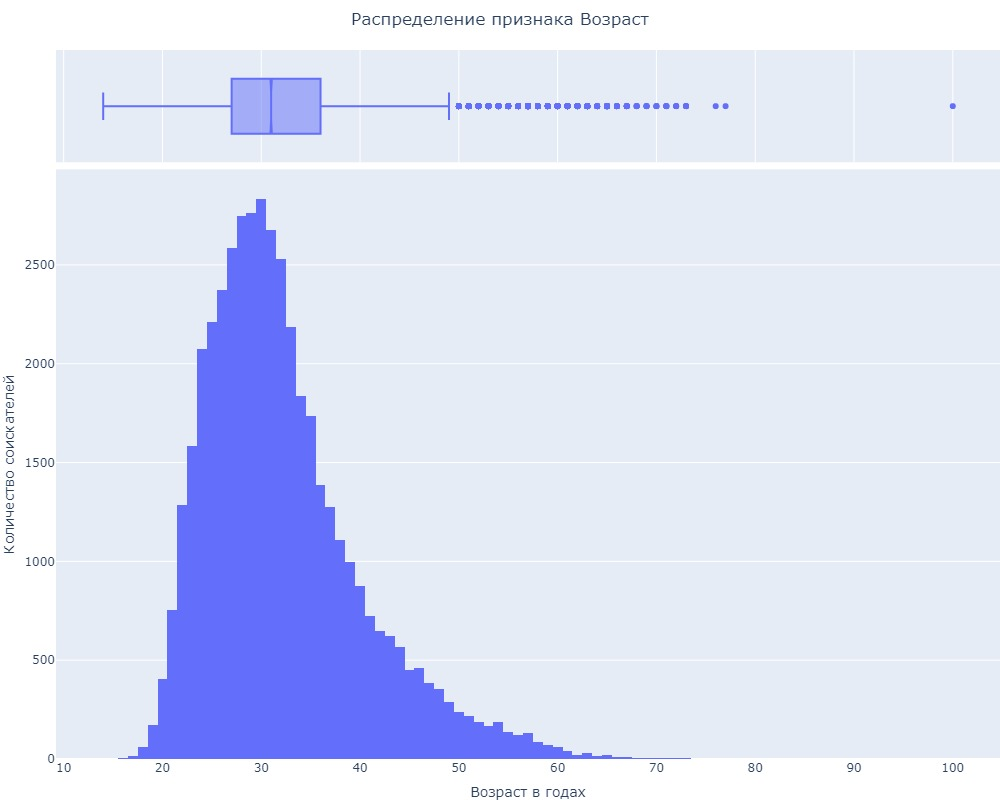

In [534]:
# Создаем гистограмму и ящик с уксами

fig = px.histogram(
    hh_df, 
    x='Возраст',
    marginal="box"
)

fig.update_layout(
    title="Распределение признака Возраст",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Возраст в годах",
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_age.html")
fig.write_image('figure_1.jpg')
Image(data = 'figure_1.jpg')

#### Вывод

* Чему равна мода распределения?
 
Ответ: 30 лет
 
* Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?

Ответ: 27 - 36 лет

* Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?

Ответ: 76 - 100 лет

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

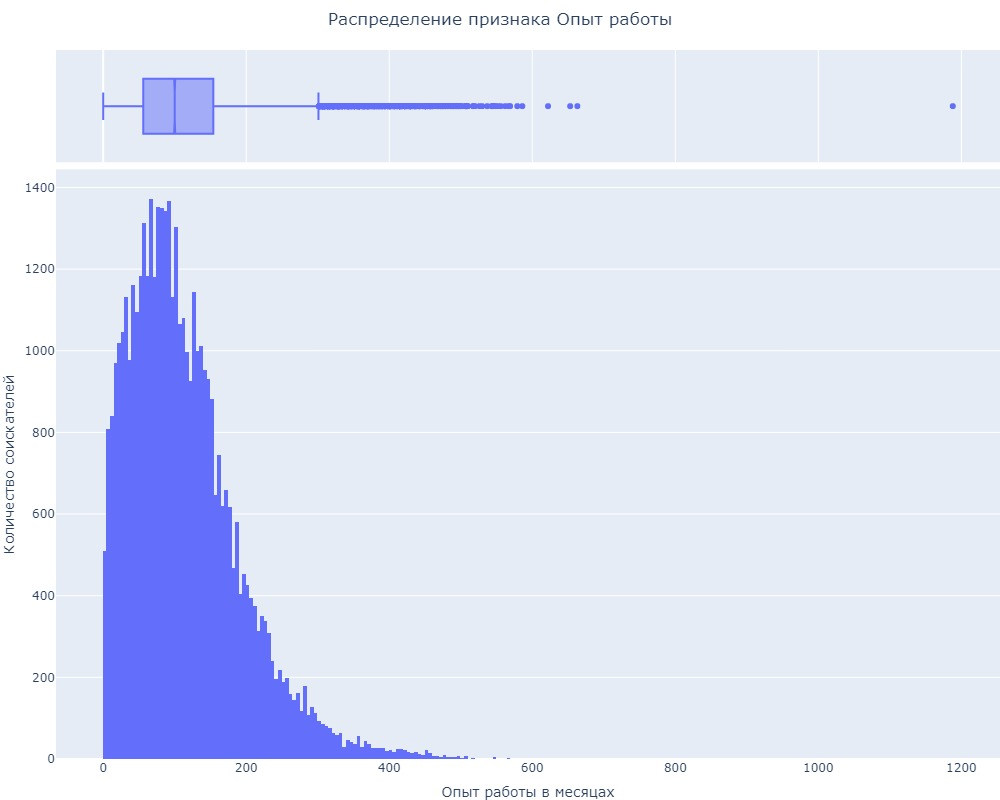

In [535]:
# Создаем гистограмму и ящик с уксами

fig = px.histogram(
    hh_df, 
    x='Опыт работы (месяц)',
    marginal="box"
)

fig.update_layout(
    title="Распределение признака Опыт работы",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Опыт работы в месяцах",
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_experience.html")
fig.write_image('figure_2.jpg')
Image(data = 'figure_2.jpg')

#### Вывод
 
* Чему равна мода распределения?
 
Ответ: 81 месяц
 
* Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?

Ответ: 56 - 154 месяца

* Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?

Ответ: 622 - 1188 месяцев (52 - 99 лет)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


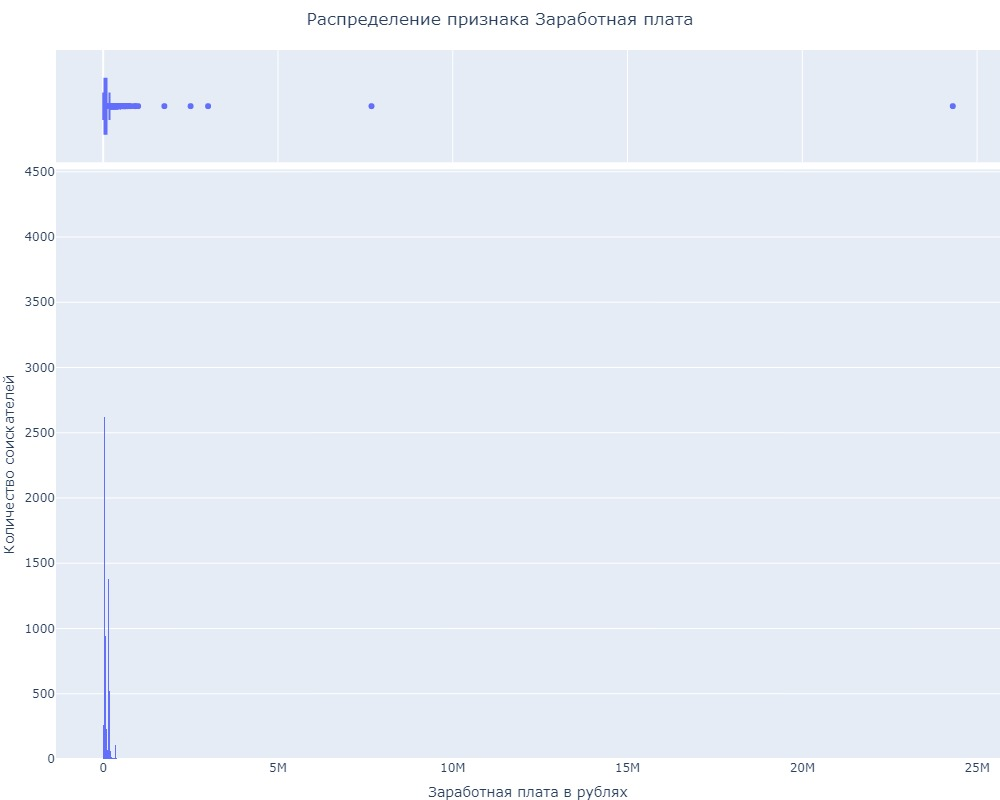

In [536]:
# Создаем гистограмму и ящик с уксами

fig = px.histogram(
    hh_df, 
    x='ЗП (руб)',
    marginal="box"
)

fig.update_layout(
    title="Распределение признака Заработная плата",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Заработная плата в рублях",
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_wage.html")
fig.write_image('figure_3.jpg')
Image(data = 'figure_3.jpg')

#### Вывод
* Чему равна мода распределения?

Ответ: 50000 руб.

* Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?

Ответ: 37000 - 95000 руб.

* Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?

Ответ: 1,75, 2,5, 3, 7,675224, 24,30488 миллионов руб.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [537]:
# Копируем данные

hh_no_mil = hh_df.copy()

# Удаляем строки где Заработная плата выше 1 миллиона рублей

hh_no_mil = hh_no_mil.loc[hh_no_mil['ЗП (руб)'] < 1000000]

# Удаляем строки где Опыт работы выше 720 месяцев

hh_no_mil = hh_no_mil.loc[hh_no_mil['Опыт работы (месяц)'] < 720]

# Преобразуем Опыт работы из месяцев в года

hh_no_mil['Опыт работы (год)'] = round(hh_no_mil['Опыт работы (месяц)'] / 12)

# Создаем столбец с медианной Заработной платой в рублях

hh_no_mil['Медианная ЗП (руб)'] = hh_no_mil['ЗП (руб)'].median()

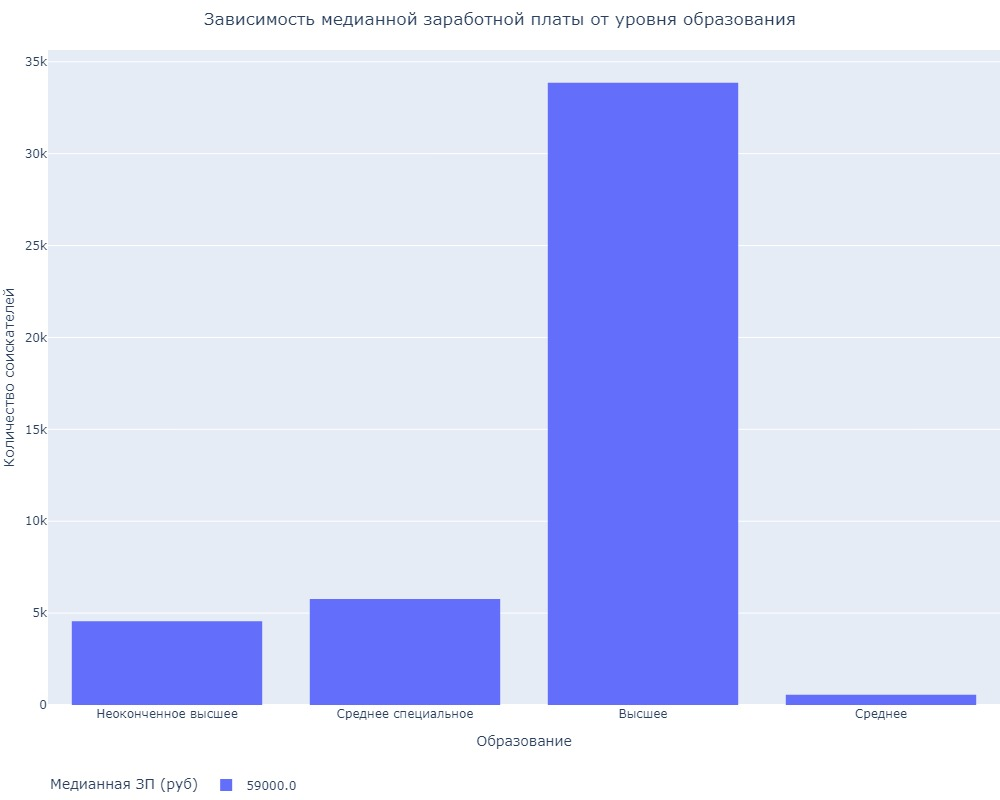

In [538]:
# Создаем гистограмму

education = hh_no_mil['Образование'].apply(lambda x: 'Высшее' \
                                    if x == 'Высшее'\
                                    else 'Неоконченное высшее' if x == 'Неоконченное высшее'\
                                    else 'Среднее специальное' if x == 'Среднее специальное'\
                                    else 'Среднее')


fig = px.histogram(
    hh_no_mil, 
    x=education,
    color='Медианная ЗП (руб)'
    
)

fig.update_layout(
    title="Зависимость медианной заработной платы от уровня образования",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Образование",
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_median_wage.html")
fig.write_image('figure_4.jpg')
Image(data = 'figure_4.jpg')

#### Вывод

* Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?

Ответ: 

наибольшее - Высшее

наименьшее - Среднее

* Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

Ответ: Да


5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

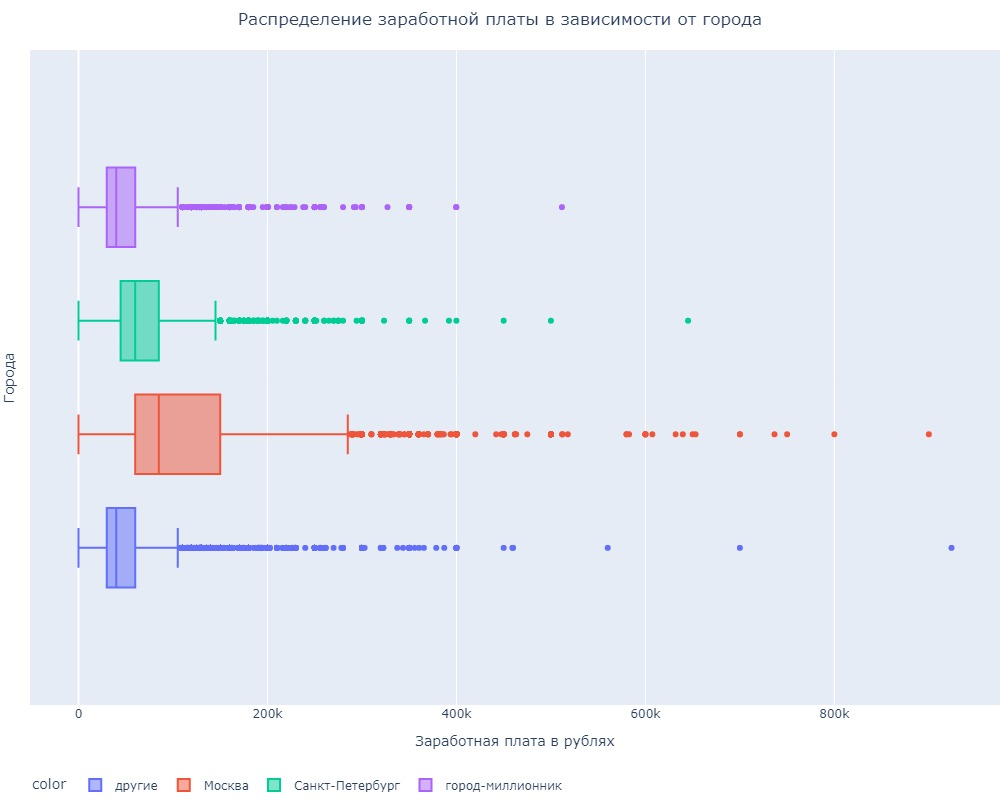

In [539]:
# Создаем ящик с усами

city_zp = hh_no_mil['Город'].apply(lambda x: 'Москва' \
                                    if x == 'Москва'\
                                    else 'Санкт-Петербург' if x == 'Санкт-Петербург'\
                                    else 'город-миллионник' if x == 'город-миллионник'\
                                    else 'другие')

fig = px.box(
    data_frame=hh_no_mil,
    x='ЗП (руб)',
    color=city_zp
)
fig.update_layout(
    title="Распределение заработной платы в зависимости от города",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Заработная плата в рублях",
    yaxis_title="Города",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/box_city.html")
fig.write_image('figure_5.jpg')
Image(data = 'figure_5.jpg')

* Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?

Ответ: Все медианы находятся в первой половине
    

* Как вы считаете, важен ли признак города при прогнозировании заработной платы?

Ответ: Да
    

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

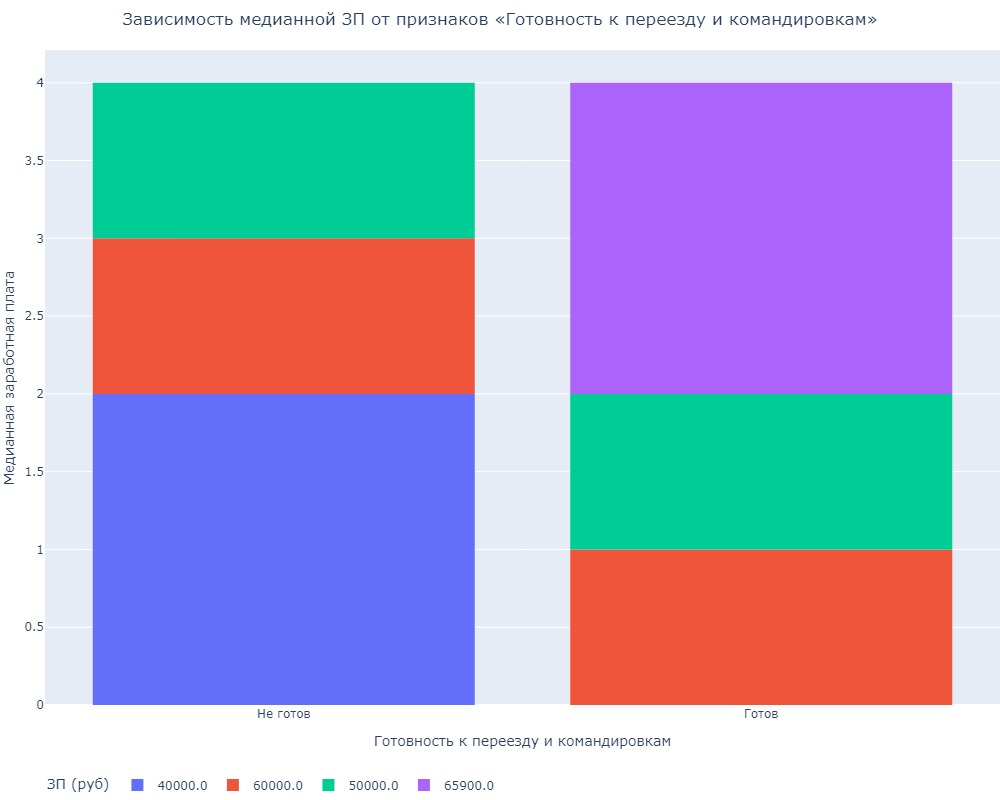

In [540]:
# Строим многоуровневую столбчатую диаграмму

ready = hh_df.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

bool_1 = ready['Готовность к переезду'].apply(lambda x: 'Готов' if x == True else 'Не готов')

bool_2 = ready['Готовность к командировкам'].apply(lambda x: 'Готов' if x == True else 'Не готов')

fig = px.histogram(ready, x=[bool_1, bool_2], color='ЗП (руб)')

fig.update_layout(
    title="Зависимость медианной ЗП от признаков «Готовность к переезду и командировкам»",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Готовность к переезду и командировкам",
    yaxis_title="Медианная заработная плата",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_wage_moving.html")
fig.write_image('figure_6.jpg')
Image(data = 'figure_6.jpg')

#### Вывод: 

Медианная заработная плата соискателей, не готовых ни к переезду ни к командировкам = 40 000 руб.

Медианная заработная плата соискателей, готовых и к переезду, и к командировкам = 65 900 руб.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

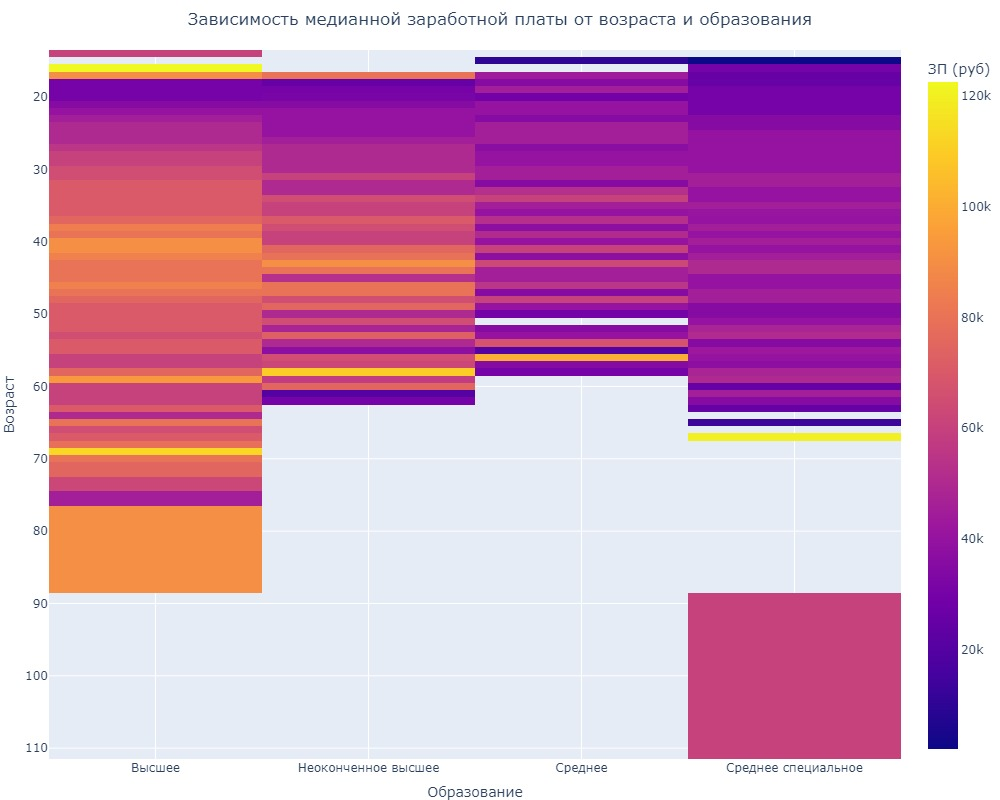

In [541]:
# Создаем сводную таблицу

pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc=['median']
)

# Создаем тепловую диаграмму

fig = px.imshow(pivot,
                labels=dict(x="Образование", y="Возраст", color="ЗП (руб)"),
                x=['Высшее', 'Неоконченное высшее', 'Среднее', 'Среднее специальное']             
               )
fig.update_layout(
    title="Зависимость медианной заработной платы от возраста и образования",
    title_x = 0.5,
    width=1000,
    height=800,
    margin=dict(l=0, r=0, t=50, b=0)
)

#fig.show()
fig.write_html("Plotly/imshow_median_wage_eduс.html")
fig.write_image('figure_7.jpg')
Image(data = 'figure_7.jpg')

#### Выводы: 

Интенсивность роста заработной платы наибольшая в категории - Высшее образование.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [542]:
# Создаем признак Опыт работы (год)

hh_df['Опыт работы (год)'] = round(hh_df['Опыт работы (месяц)'] / 12)

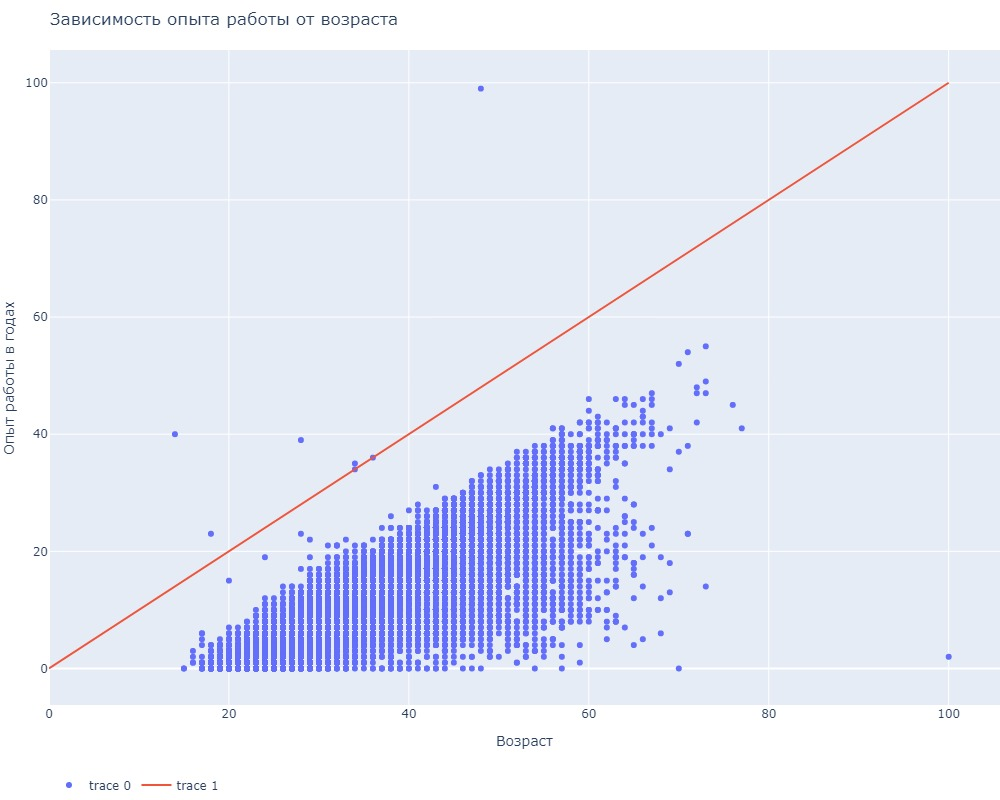

In [543]:
# Строим в Plotly диаграмму рассеяния с диагональной линией проходящей по точкам от 0 - 100

import plotly.graph_objects as go

fig = go.Figure() 

fig.add_trace(go.Scatter(
    x=hh_df['Возраст'], 
    y=hh_df['Опыт работы (год)'],
    mode='markers'
))

fig.add_trace(go.Scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines'
))

fig.update_layout(
    title='Зависимость опыта работы от возраста',  
    width=1000,
    height=800,
    xaxis_title='Возраст',
    yaxis_title='Опыт работы в годах',
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0))
    
#fig.show()
fig.write_html("Plotly/Scatter_experience_adg.html")
fig.write_image('figure_8.jpg')
Image(data = 'figure_8.jpg')

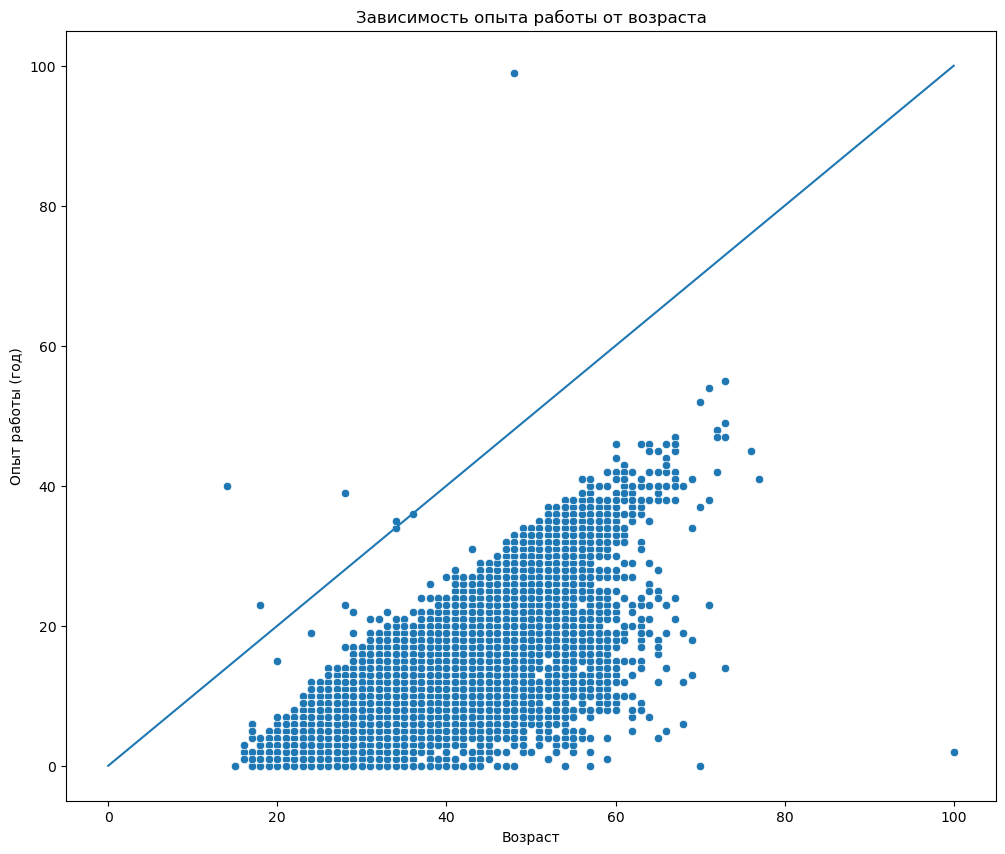

In [544]:
# Строим диаграмму рассеяния с диагональной линией проходящей по точкам от 0 - 100

fig = plt.figure(figsize=(12,10)) 
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(data=hh_df, x='Возраст', y='Опыт работы (год)')
ax.set_title('Зависимость опыта работы от возраста');

#### Вывод:

Количество точек лежащие на прямой и выше = 7

Данные точки свидетельствуют об аномалиях в данных (опыт работы больше либо равен возрасту соискателя).

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


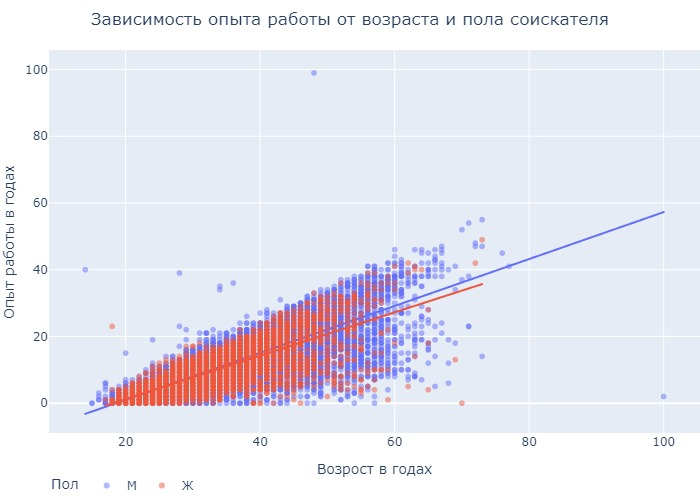

In [545]:
# Строим диаграмму рассеяния

fig = px.scatter(hh_df, x='Возраст',  y='Опыт работы (год)', color='Пол', opacity=0.5, trendline='ols')

fig.update_layout(
    title="Зависимость опыта работы от возраста и пола соискателя",
    title_x = 0.5,
    xaxis_title="Возрост в годах",
    yaxis_title="Опыт работы в годах",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0))

#fig.show()
fig.write_html("Plotly/Scatter_experience_adg_sex.html")
fig.write_image('figure_9.jpg')
Image(data = 'figure_9.jpg')

#### Вывод:

Анамальные выбросы в основном у мужчин.

Женщины в основном находятся в поиске работы до 55 - 60 лет. 

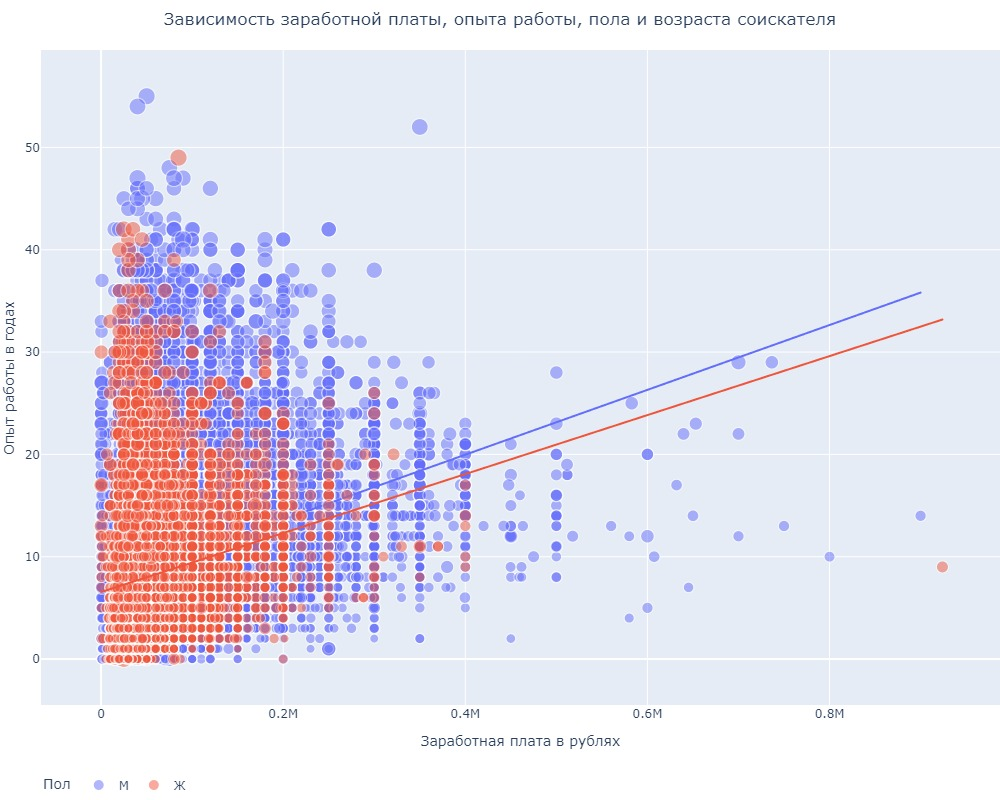

In [546]:
# Строим диаграмму рассеяния

fig = px.scatter(hh_no_mil, x='ЗП (руб)',  y='Опыт работы (год)', color='Пол', size='Возраст', opacity=0.5, trendline='ols')

fig.update_layout(
    title="Зависимость заработной платы, опыта работы, пола и возраста соискателя",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Заработная плата в рублях",
    yaxis_title="Опыт работы в годах",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0))

#fig.show()
fig.write_html("Plotly/Scatter_salary_experience_adg_sex.html")
fig.write_image('figure_10.jpg')
Image(data = 'figure_10.jpg')

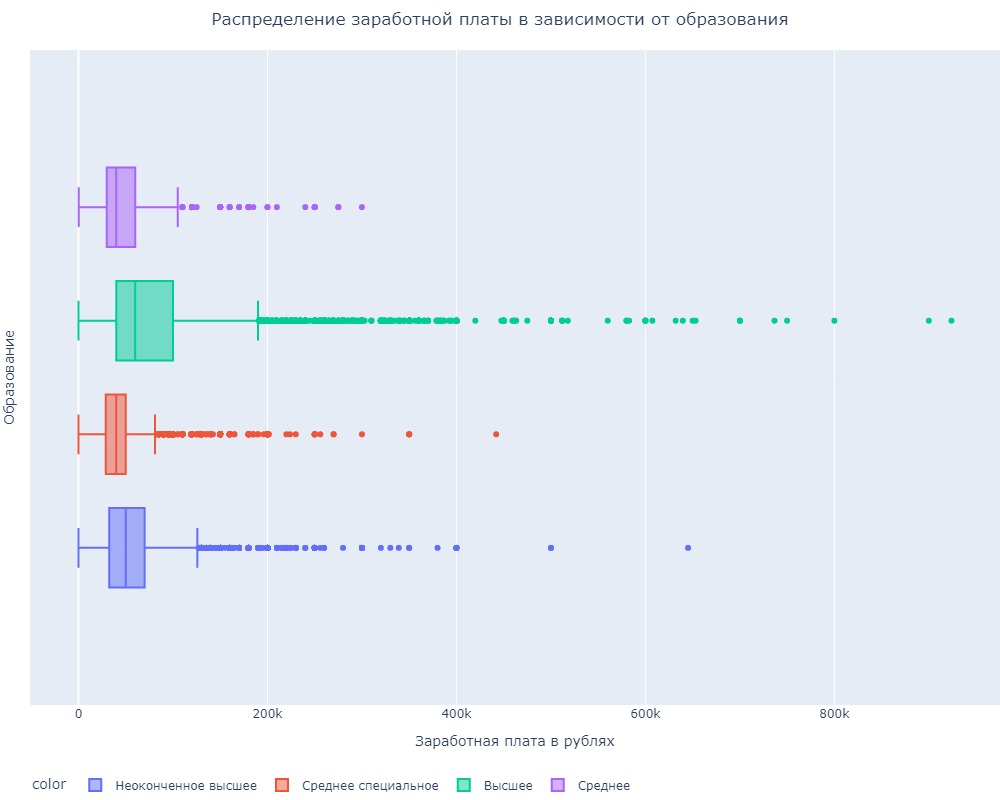

In [547]:
# Создаем ящик с уксами

education = hh_no_mil['Образование'].apply(lambda x: 'Высшее' \
                                    if x == 'Высшее'\
                                    else 'Неоконченное высшее' if x == 'Неоконченное высшее'\
                                    else 'Среднее специальное' if x == 'Среднее специальное'\
                                    else 'Среднее')

fig = px.box(
    data_frame=hh_no_mil,
    x='ЗП (руб)',
    color=education
)
fig.update_layout(
    title="Распределение заработной платы в зависимости от образования",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Заработная плата в рублях",
    yaxis_title="Образование",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/box_salary_exduc.html")
fig.write_image('figure_11.jpg')
Image(data = 'figure_11.jpg')

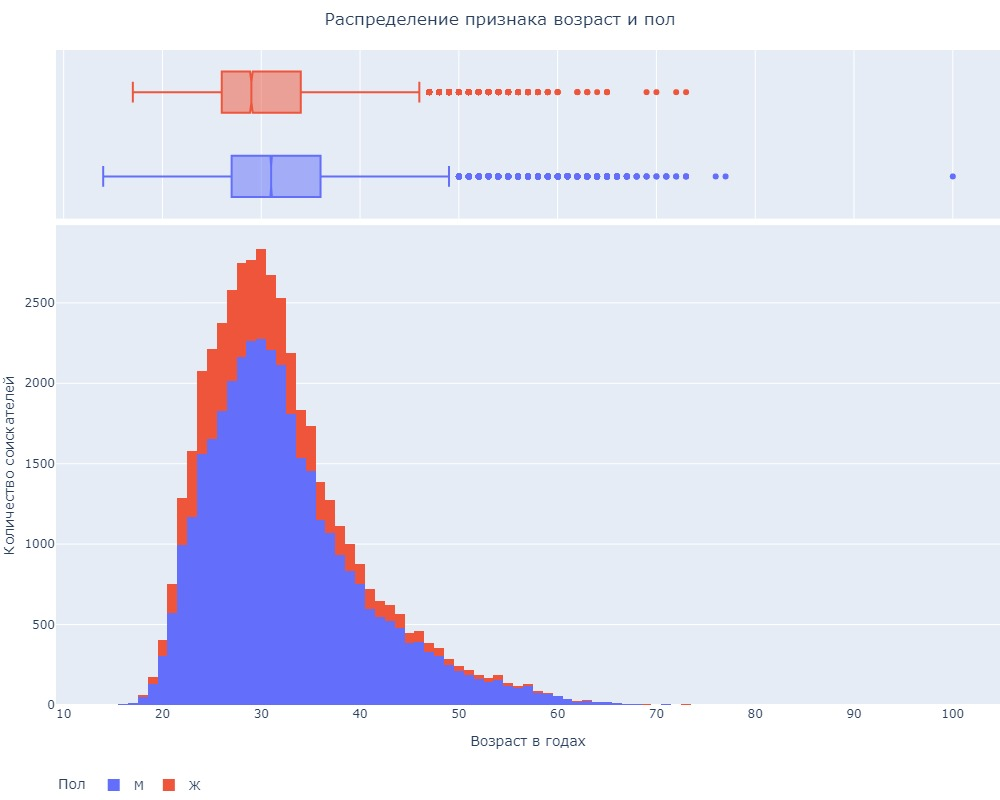

In [548]:
# Создаем гистограмму и ящик с уксами

fig = px.histogram(
    hh_df, 
    x='Возраст',
    color='Пол',
    marginal="box"
)

fig.update_layout(
    title="Распределение признака возраст и пол",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Возраст в годах",
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_adg_sex.html")
fig.write_image('figure_12.jpg')
Image(data = 'figure_12.jpg')

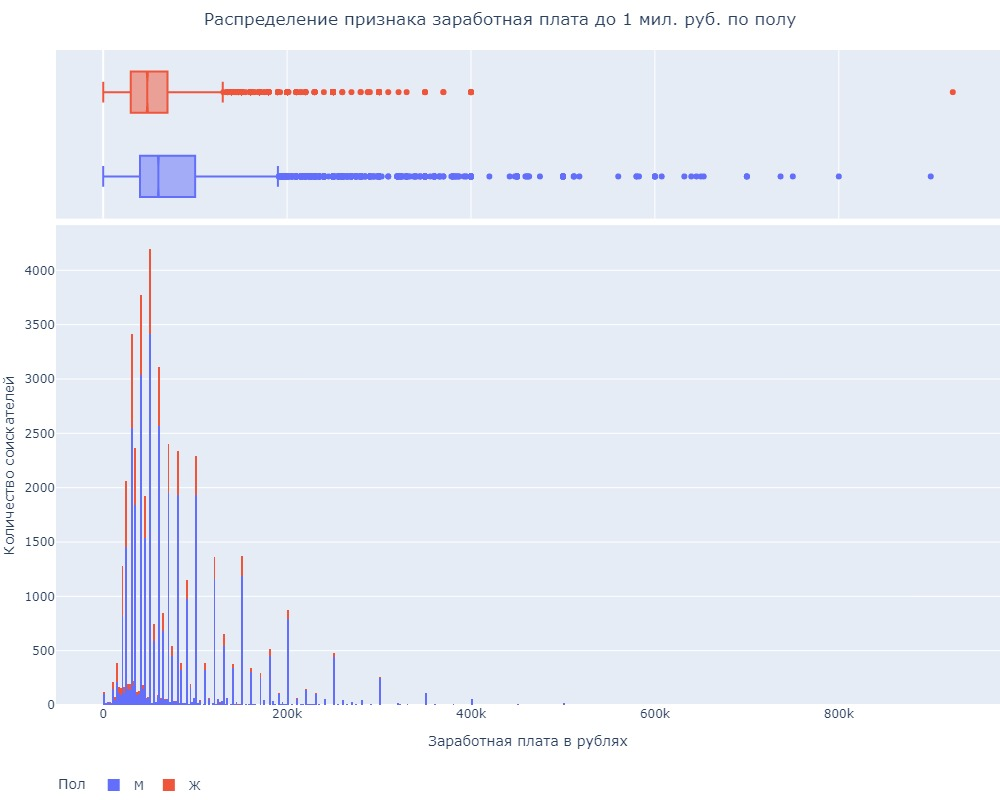

In [549]:
# Создаем гистограмму и ящик с уксами

fig = px.histogram(
    hh_no_mil, 
    x='ЗП (руб)',
    color='Пол',
    marginal="box"
)

fig.update_layout(
    title="Распределение признака заработная плата до 1 мил. руб. по полу",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Заработная плата в рублях",
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_salary_1mil_sex.html")
fig.write_image('figure_13.jpg')
Image(data = 'figure_13.jpg')

#### Вывод:

Мужчины: медианная заработная плата = 60 000 руб.

Женщины: медианная заработная плата = 48 000 руб.

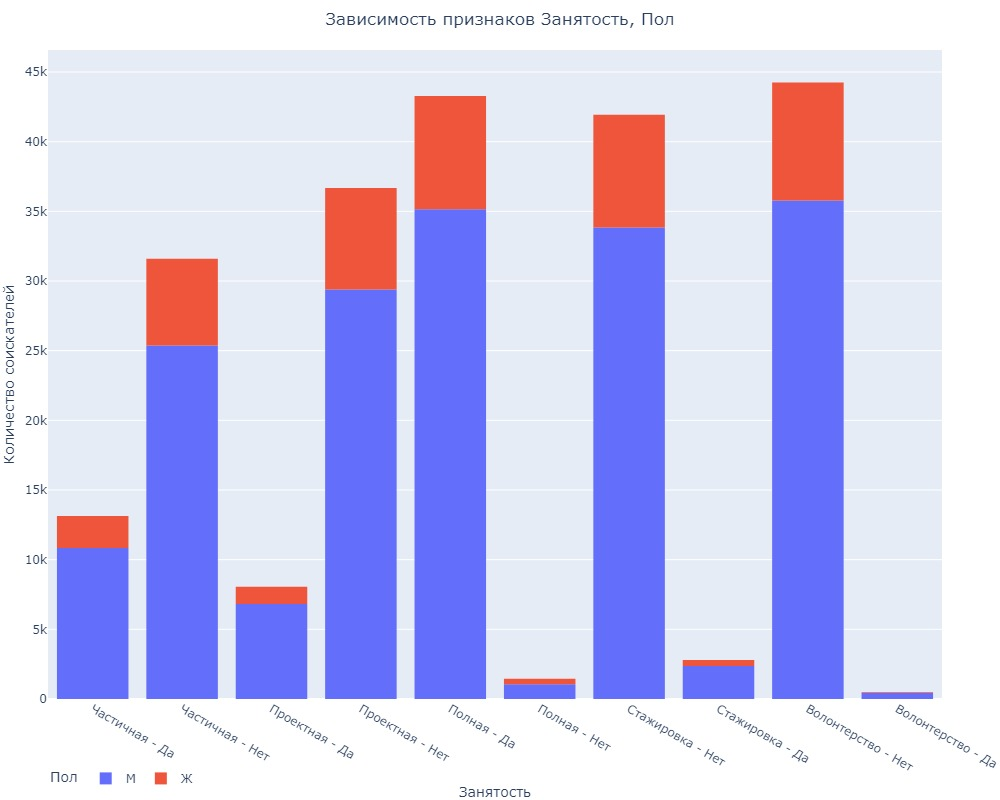

In [550]:
# Создаем гистограмму

z_df = [hh_no_mil['частичная занятость'].apply(lambda x: 'Частичная - Да' if x == True else 'Частичная - Нет'),
          hh_no_mil['проектная работа'].apply(lambda x: 'Проектная - Да' if x == True else 'Проектная - Нет'),
          hh_no_mil['полная занятость'].apply(lambda x: 'Полная - Да' if x == True else 'Полная - Нет'),
          hh_no_mil['стажировка'].apply(lambda x: 'Стажировка - Да' if x == True else 'Стажировка - Нет'),
          hh_no_mil['волонтерство'].apply(lambda x: 'Волонтерство - Да' if x == True else 'Волонтерство - Нет')
         ]

s = {'Частичная':hh_no_mil['частичная занятость'].apply(lambda x: 'Да' if x == True else 'Нет')}

fig = px.histogram(
    hh_no_mil, 
    x=z_df,
    #y='ЗП (руб)',
    color='Пол'
)

fig.update_layout(
    title="Зависимость признаков Занятость, Пол",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title='Занятость',
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_employ_sex.html")
fig.write_image('figure_14.jpg')
Image(data = 'figure_14.jpg')

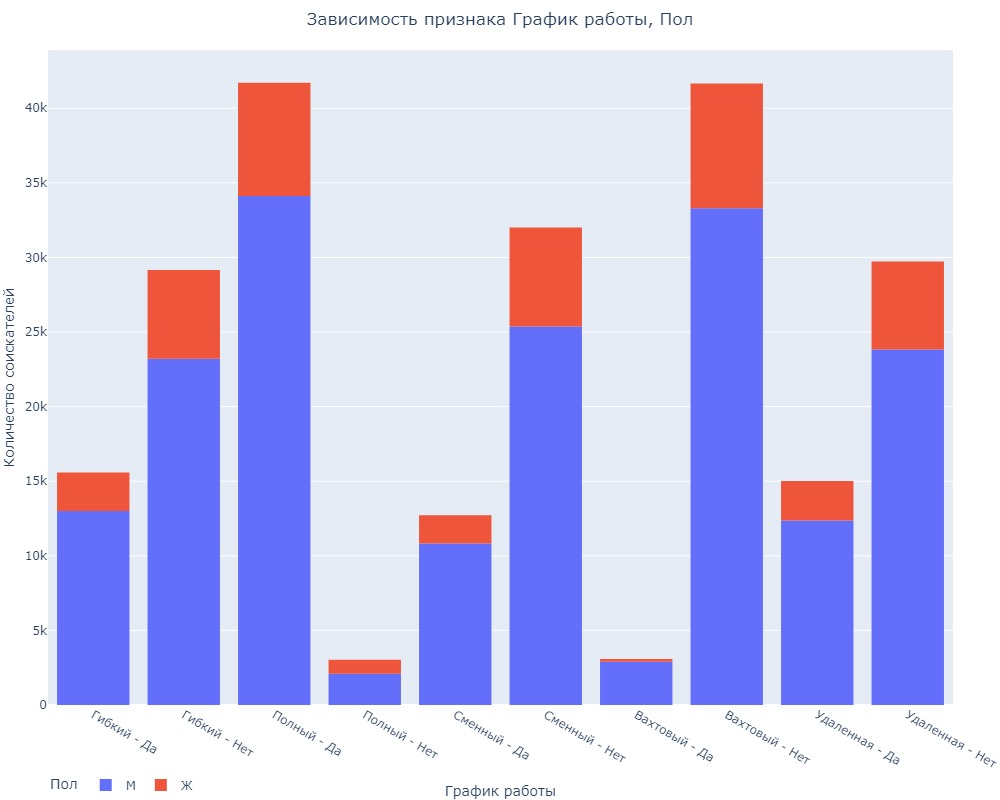

In [551]:
# Создаем гистограмму

g_df = [hh_no_mil['гибкий график'].apply(lambda x: 'Гибкий - Да' if x == True else 'Гибкий - Нет'),
          hh_no_mil['полный день'].apply(lambda x: 'Полный - Да' if x == True else 'Полный - Нет'),
          hh_no_mil['сменный график'].apply(lambda x: 'Сменный - Да' if x == True else 'Сменный - Нет'),
          hh_no_mil['вахтовый метод'].apply(lambda x: 'Вахтовый - Да' if x == True else 'Вахтовый - Нет'),
          hh_no_mil['удаленная работа'].apply(lambda x: 'Удаленная - Да' if x == True else 'Удаленная - Нет')
         ]

 
fig = px.histogram(
    hh_no_mil, 
    x=g_df,
    color='Пол'
)

fig.update_layout(
    title="Зависимость признака График работы, Пол",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title='График работы',
    yaxis_title="Количество соискателей",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0)
)
#fig.show()
fig.write_html("Plotly/hist_schedule_sex.html")
fig.write_image('figure_15.jpg')
Image(data = 'figure_15.jpg')

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [552]:
# Смотрим полные дубликаты строк

hh_df[hh_df.duplicated()]

# Удаляем полные дубликаты строк

hh_df = hh_df.drop_duplicates()

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [553]:
# Смотрим информацию о числе пропусков в столбцах
hh_df.isnull().sum()

Ищет работу на должность:          0
Последнее/нынешнее место работы    1
Последняя/нынешняя должность       2
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
частичная занятость                0
проектная работа                   0
полная занятость                   0
стажировка                         0
волонтерство                       0
гибкий график                      0
полный день                        0
сменный график                     0
вахтовый метод                     0
удаленная работа                   0
ЗП (руб)                           0
Опыт работы (год)                  0
dtype: int64

In [554]:
# При преобразовании столбца Опыт работы в столбец Опыт работы (месяц) произошло замещение NaN на 0
# Заменяем значение 0 на NaN

hh_df.loc[hh_df['Опыт работы (месяц)'] == 0, 'Опыт работы (месяц)'] = np.nan
hh_df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
частичная занятость                  0
проектная работа                     0
полная занятость                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
ЗП (руб)                             0
Опыт работы (год)                    0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [555]:
# Удаляем строки со значения ми NaN в определенных столбцах

hh_df = hh_df.dropna (subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Считаем медиану столбца Опыт работы (месяц)

med = hh_df['Опыт работы (месяц)'].median()

# Заменяем NaN на медианное значение

hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы (месяц)'].fillna(med)

# Смотрим среднее по столбцу Опыт работы (месяц)

hh_df['Опыт работы (месяц)'].mean()

114.57197012180077

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [556]:
# Смотрим выбрасы в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей

hh_df[(hh_df['ЗП (руб)'] > 1000000) | (hh_df['ЗП (руб)'] < 1000)].shape[0]

89

In [557]:
# Удаляем выбрасы в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей

hh_df = hh_df.loc[(hh_df['ЗП (руб)'] < 1000000) & (hh_df['ЗП (руб)'] > 1000)]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [558]:
# Смотрим выбросы в которых опыт работы в годах равен или превышает возраст соискателя

hh_df[hh_df['Опыт работы (год)'] >= hh_df['Возраст']].shape[0]

7

In [559]:
# Удаляем выбрасы в которых опыт работы в годах был равен или превышал возраст соискателя

hh_df = hh_df.loc[(hh_df['Опыт работы (год)'] < hh_df['Возраст']) & (hh_df['Опыт работы (год)'] != hh_df['Возраст'])]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

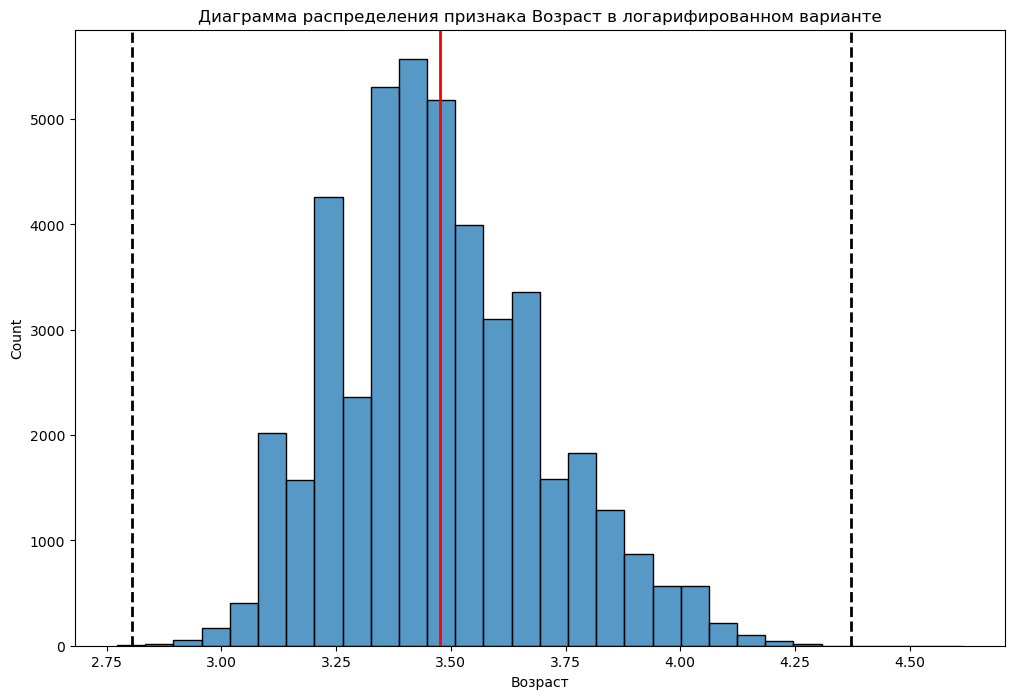

In [560]:
# Строим гистаграмму распределения признака Возраст

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
log_age = np.log(hh_df['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Диаграмма распределения признака Возраст в логарифированном варианте');

#### Вывод:

Логарифмическое распределение асимметрично в левую сторону.

In [561]:
# Выводим функцию реализующую алгоритм метода z-откланения
# Функция возвращает выбросы и очищенные от них данные

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_df, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44459


In [562]:
# Удаляем выбросы найденные с помощью метода z-отклонения

hh_clean_df = hh_df.drop(outliers.index, axis=0)

# Выводим таблицу выбрасов

outliers['Возраст']

22518    100.0
35566     15.0
41993     15.0
Name: Возраст, dtype: float64

#### Вывод:

В выбросы попадает возраст 15 и 100 лет.